## Brain Tumour Classifier

In [12]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

training_dir = 'Training'

datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    training_dir,
    target_size=(140, 140),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    training_dir,
    target_size=(140, 140),
    batch_size=32,
    class_mode='categorical',
    
    subset='validation'
)

inputs = Input(shape=(140, 140, 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(train_generator.num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

model.save('segmentation_model_1.0.keras')

Found 4481 images belonging to 4 classes.
Found 1118 images belonging to 4 classes.
Epoch 1/10


c:\Users\Tibi Fejes\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 45s 306ms/step - accuracy: 0.5245 - loss: 1.0057 - val_accuracy: 0.7138 - val_loss: 0.7719
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 43s 304ms/step - accuracy: 0.8205 - loss: 0.4368 - val_accuracy: 0.7621 - val_loss: 0.6636
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 44s 310ms/step - accuracy: 0.8903 - loss: 0.2980 - val_accuracy: 0.7415 - val_loss: 0.6834
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 42s 299ms/step - accuracy: 0.9147 - loss: 0.2203 - val_accuracy: 0.7710 - val_loss: 0.6137
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 43s 306ms/step - accuracy: 0.9437 - loss: 0.1550 - val_accuracy: 0.7898 - val_loss: 0.6816
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 44s 310ms/step - accuracy: 0.9592 - loss: 0.1154 - val_accuracy: 0.7791 - val_loss: 0.8576
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 43s 303ms/step - accuracy: 0.9721 - loss: 0.0799 - val_accuracy: 0.7826 - val_loss: 0.7759
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 42s 297ms/step - accuracy: 0.9833 - loss: 0.0459 - val

Found 1311 images belonging to 4 classes.


c:\Users\Tibi Fejes\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step

Classification Report:
              precision    recall  f1-score   support

      glioma       0.90      0.96      0.93       300
  meningioma       0.94      0.77      0.85       306
     notumor       0.94      0.97      0.96       405
   pituitary       0.92      0.98      0.95       300

    accuracy                           0.93      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.93      0.93      0.92      1311



Loss:  0.026561159640550613
Accuracy:  0.9930819272994995


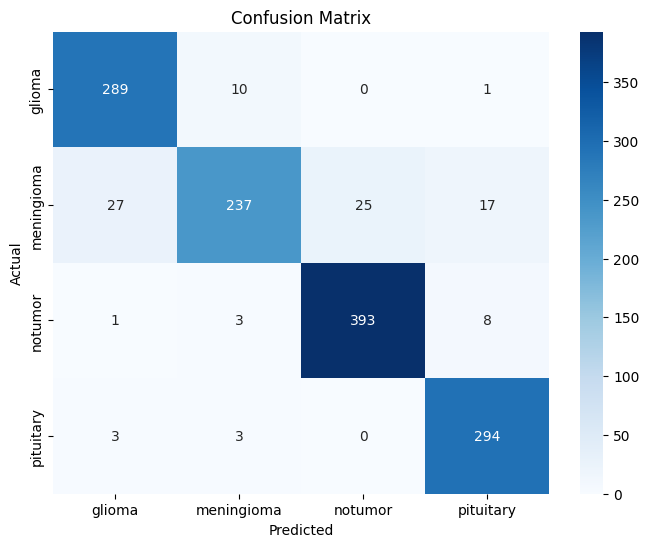

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

img_height, img_width = 140, 140
batch_size = 30

test_dir = "Testing"

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

model = tf.keras.models.load_model("brain_tumor_classifier_1.0.keras")

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

print("\n\nLoss: ", history.history['loss'][-1])
print("Accuracy: ", history.history['accuracy'][-1])

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()